**RIDGE REGRESSION**

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
# Load dataset

df = pd.read_excel("/content/Health_Risk.xlsx")

print("\nDataset dimensions:", df.shape)
print("\nFirst few rows:\n", df.head())


Dataset dimensions: (900, 15)

First few rows:
    Patient_ID  Age  Height_cm  Weight_kg    BMI  Systolic_BP  Diastolic_BP  \
0           1   54     180.08      87.48  26.97       131.12         81.34   
1           2   62     162.95      80.08  30.16       137.29         85.55   
2           3   61     166.85      96.67  34.72       148.49         93.32   
3           4   56     180.56      89.26  27.38       141.68         84.42   
4           5   63     170.38     120.00  41.34       147.90         91.48   

   Total_Cholesterol     LDL    HDL  Triglycerides  Fasting_Glucose  \
0             167.86  146.99  40.06          65.23          107.815   
1             205.71  138.59  37.08          75.61          111.400   
2             185.57  127.87  36.53          74.81           94.970   
3             216.98  149.12  49.37         145.46          119.600   
4             225.85  161.33  40.30         115.33          107.640   

   Smoking_Status  Physical_Activity_Level  Risk_Score 

In [ ]:
print(df.describe())

       Patient_ID         Age   Height_cm   Weight_kg         BMI  \
count  900.000000  900.000000  900.000000  900.000000  900.000000   
mean   450.500000   52.071111  167.115889   88.644233   31.995456   
std    259.951919   11.490841    8.120458   18.744024    7.287889   
min      1.000000   30.000000  141.480000   49.640000   16.800000   
25%    225.750000   44.000000  161.932500   73.840000   26.457500   
50%    450.500000   52.000000  167.130000   87.395000   31.285000   
75%    675.250000   60.000000  172.425000  103.920000   36.987500   
max    900.000000   80.000000  195.850000  120.000000   51.970000   

       Systolic_BP  Diastolic_BP  Total_Cholesterol         LDL         HDL  \
count   900.000000    900.000000         900.000000  900.000000  900.000000   
mean    139.262256     88.750644         210.506067  147.459989   47.466322   
std      10.741733      7.066089          35.226136   25.739846    9.799241   
min     110.000000     67.450000          86.100000   65.94000

In [ ]:
# Checking for missing values

df.isnull().sum()

,0
Patient_ID,0
Age,0
Height_cm,0
Weight_kg,0
BMI,0
Systolic_BP,0
Diastolic_BP,0
Total_Cholesterol,0
LDL,0
HDL,0


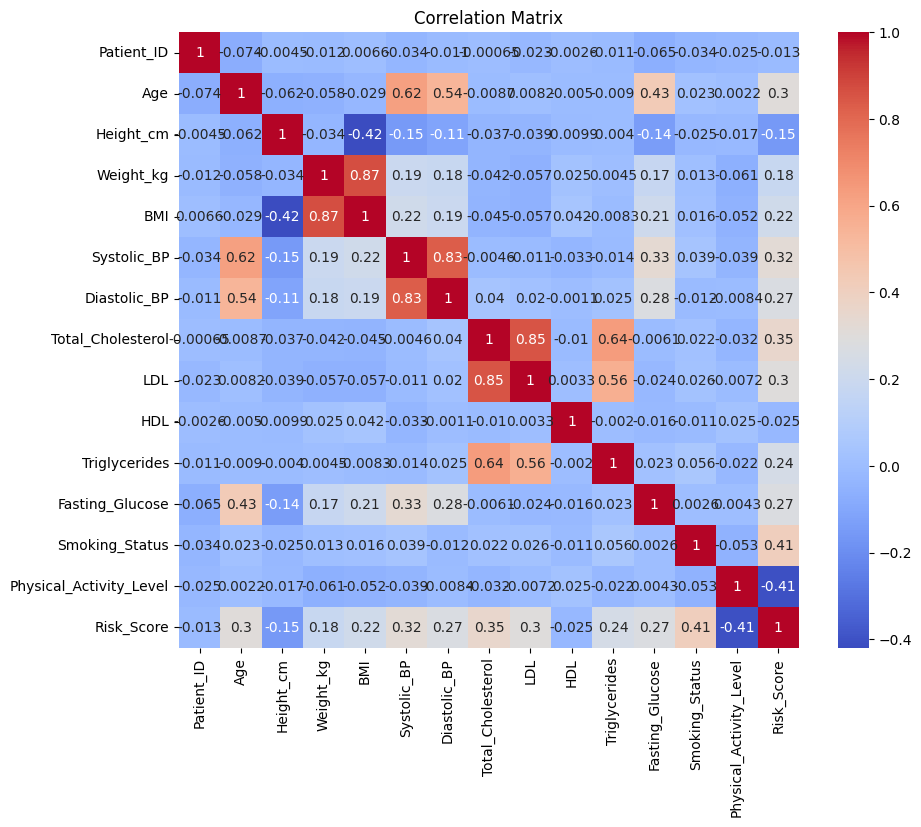

In [ ]:
# Correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Defining variables

X = df.drop("Risk_Score", axis=1)
y = df["Risk_Score"]

In [ ]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Multicollinearity Check

X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print(vif_data)

                    Feature          VIF
0                     const  1763.106597
1                Patient_ID     1.014813
2                       Age     1.988564
3                 Height_cm     2.834485
4                 Weight_kg     9.756241
5                       BMI    11.723099
6               Systolic_BP     3.899752
7              Diastolic_BP     3.284057
8         Total_Cholesterol     4.318719
9                       LDL     3.753927
10                      HDL     1.010261
11            Triglycerides     1.704460
12          Fasting_Glucose     1.323615
13           Smoking_Status     1.016181
14  Physical_Activity_Level     1.014884


In [ ]:
# Standardizing

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression Results")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression Results
R2 Score: 0.5225962721780977
RMSE: 2.030316036279714


In [ ]:
# Cross-Validated Ridge

alphas = np.logspace(-3, 3, 100)

ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

best_alpha = ridge_cv.alpha_
print("Best Alpha:", best_alpha)


Best Alpha: 11.497569953977356


In [ ]:
# Ridge Regression

ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

y_pred_ridge_best = ridge_best.predict(X_test_scaled)

print("\nRidge Regression Results")
print("R2:", r2_score(y_test, y_pred_ridge_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge_best)))


Ridge Regression Results
R2: 0.5232420045152688
RMSE: 2.028942477309961


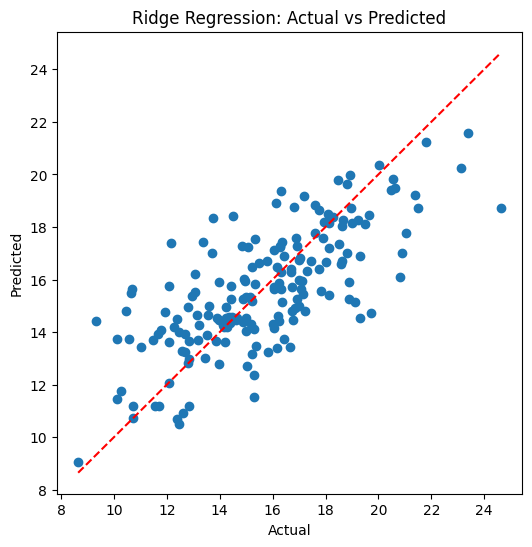

In [ ]:
# Scatter plot

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge_best)

# Diagonal reference line
min_val = min(y_test.min(), y_pred_ridge_best.min())
max_val = max(y_test.max(), y_pred_ridge_best.max())

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

                    Feature  Linear_Coeff  Ridge_Coeff
0                Patient_ID      0.006523     0.006690
1                       Age      0.534029     0.521893
2                 Height_cm     -0.081474    -0.090379
3                 Weight_kg      0.141110     0.157371
4                       BMI      0.309806     0.286764
5               Systolic_BP      0.336114     0.329771
6              Diastolic_BP      0.029076     0.042074
7         Total_Cholesterol      1.003906     0.943897
8                       LDL      0.054293     0.095459
9                       HDL      0.013640     0.012366
10            Triglycerides      0.025058     0.040031
11          Fasting_Glucose      0.363774     0.363619
12           Smoking_Status      1.182559     1.165256
13  Physical_Activity_Level     -1.083412    -1.069083


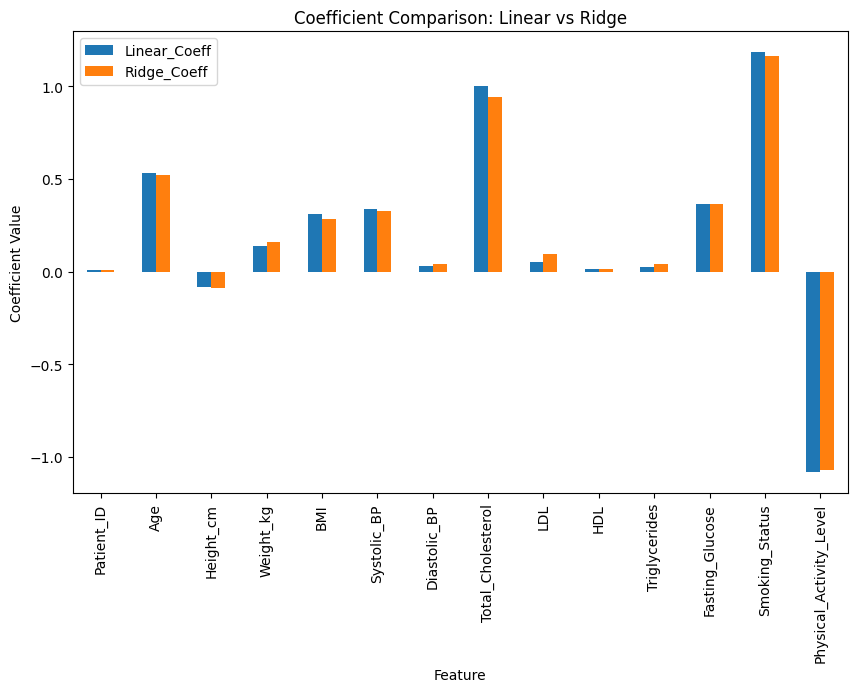

In [ ]:
# Compare Coefficients to see the shrinkage

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear_Coeff": lr.coef_,
    "Ridge_Coeff": ridge_best.coef_
})

print(coef_df)

coef_df.set_index("Feature").plot(kind="bar", figsize=(10,6))
plt.title("Coefficient Comparison: Linear vs Ridge")
plt.ylabel("Coefficient Value")
plt.show()